In [17]:
import tensorflow as tf
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt

# Convolutional Layer

D:\Anaconda3\lib\site-packages\sklearn\datasets\base.py:762: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  images = [imread(filename) for filename in filenames]
D:\Anaconda3\lib\site-packages\sklearn\datasets\base.py:762: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  images = [imread(filename) for filename in filenames]


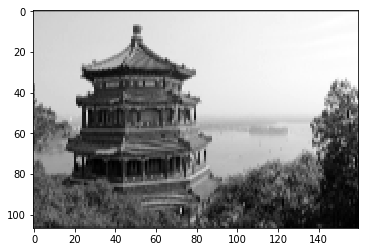

In [43]:
from sklearn.datasets import load_sample_images
dataset=np.array(load_sample_images().images,dtype=np.float32)
batch_size,height,width,channels=dataset.shape

filters=np.zeros((7,7,channels,2),np.float32)
filters[:,3,:,0]=1#vertical
filters[3,:,:,1]=1#horizontal

X=tf.placeholder(tf.float32,(None,height,width,channels))
convolution=tf.nn.conv2d(X,filters,strides=[1,4,4,1],padding='SAME')

with tf.Session() as sess:
    output=sess.run(convolution,feed_dict={X:dataset})

#plt.subplot(311)
#plt.imshow(dataset[0],cmap='gray')
#plt.subplot(312)
plt.imshow(output[0,:,:,0],cmap='gray')
#plt.subplot(313)
#plt.imshow(output[0,:,:,1],cmap='gray')
plt.show()

# Pooling Layer

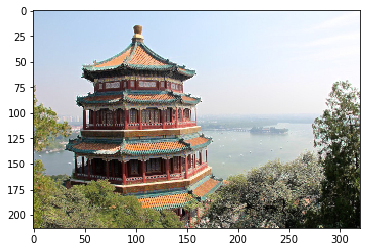

In [48]:
X=tf.placeholder(tf.float32,(None,height,width,channels))
max_pool=tf.nn.max_pool(X,ksize=[1,2,2,1],strides=[1,2,2,1],padding='VALID')

with tf.Session() as sess:
    output=sess.run(max_pool,feed_dict={X:dataset})

plt.imshow(output[0].astype(np.uint8))
plt.show()

# MNIST

In [1]:
import tensorflow as tf
import numpy as np

D:\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("./my_datasets_mnist")

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./my_datasets_mnist\train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./my_datasets_mnist\train-labels-idx1-ubyte.gz
Extracting ./my_datasets_mnist\t10k-images-idx3-ubyte.gz
Extracting ./my_datasets_mnist\t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [5]:
height=28
width=28
channels=1
n_inputs=height*width
n_outputs=10

conv1_fmaps=32
conv1_ksize=3
conv1_stride=1
conv1_pad='SAME'

pool2_fmaps=conv1_fmaps

conv3_fmaps=64
conv3_ksize=3
conv3_stride=2
conv3_pad='SAME'

n_full4=conv3_fmaps
n_output=10

tf.reset_default_graph()
with tf.name_scope('input'):
    X=tf.placeholder(tf.float32,(None,n_inputs),'X')
    X_reshaped=tf.reshape(X,shape=[-1,height,width,channels])
    y=tf.placeholder(tf.int32,(None),'y')

conv1=tf.layers.conv2d(X_reshaped,conv1_fmaps,conv1_ksize,strides=conv1_stride,
                      padding=conv1_pad,activation=tf.nn.elu,name='conv1')

#pool2=tf.layers.max_pooling2d(conv1,pool_size=(14*14),strides=(2,2))
pool2 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding="VALID")
#pool2_reshaped=tf.reshape(pool2,shape=[-1,height/2,width/2,channels])

conv3=tf.layers.conv2d(pool2,conv3_fmaps,conv3_ksize,strides=conv3_stride,
                     padding=conv3_pad,activation=tf.nn.elu,name='conv3')
conv3_flat = tf.reshape(conv3, shape=[-1, conv3_fmaps * 7*7])

full4=tf.layers.dense(conv3_flat,n_full4,activation=tf.nn.elu,name='full4')

logits=tf.layers.dense(full4,n_outputs,name='output')

with tf.name_scope('train'):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(logits=logits, labels=y)
    loss = tf.reduce_mean(xentropy)
    optimizer = tf.train.AdamOptimizer()
    training_op = optimizer.minimize(loss)

with tf.name_scope('eval'):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))
    
init=tf.global_variables_initializer()
saver=tf.train.Saver()

In [6]:
logits

<tf.Tensor 'output/BiasAdd:0' shape=(?, 10) dtype=float32>

In [9]:
n_epochs=10
batch_size=100

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for iteration in range(10):#(mnist.train.num_examples//batch_size):
            X_batch,y_batch=mnist.train.next_batch(batch_size)
            training_op.run(feed_dict={X:X_batch,y:y_batch})
        acc_train=accuracy.eval(feed_dict={X:X_batch,y:y_batch})
        acc_test=accuracy.eval(feed_dict={X:mnist.test.images,
                                         y:mnist.test.labels})
        print(epoch,'Train acc:',acc_train,'Test acc:',acc_test)
    save_path = saver.save(sess, "./saved_models/cnn_on_mnist.ckpt")

0 Train acc: 0.74 Test acc: 0.736
1 Train acc: 0.87 Test acc: 0.8287
2 Train acc: 0.8 Test acc: 0.8257
3 Train acc: 0.85 Test acc: 0.8848
4 Train acc: 0.9 Test acc: 0.8846
5 Train acc: 0.94 Test acc: 0.8989
6 Train acc: 0.85 Test acc: 0.8967
7 Train acc: 0.91 Test acc: 0.9053
8 Train acc: 0.95 Test acc: 0.9116
9 Train acc: 0.9 Test acc: 0.9046


In [ ]:
height = 28
width = 28
channels = 1
n_inputs = height * width

conv1_fmaps = 32
conv1_ksize = 3
conv1_stride = 1
conv1_pad = "SAME"

conv2_fmaps = 64
conv2_ksize = 3
conv2_stride = 2
conv2_pad = "SAME"

pool3_fmaps = conv2_fmaps

n_fc1 = 64
n_outputs = 10

reset_graph()

with tf.name_scope("inputs"):
    X = tf.placeholder(tf.float32, shape=[None, n_inputs], name="X")
    X_reshaped = tf.reshape(X, shape=[-1, height, width, channels])
    y = tf.placeholder(tf.int32, shape=[None], name="y")

conv1 = tf.layers.conv2d(X_reshaped, filters=conv1_fmaps, kernel_size=conv1_ksize,
                         strides=conv1_stride, padding=conv1_pad,
                         activation=tf.nn.relu, name="conv1")
conv2 = tf.layers.conv2d(conv1, filters=conv2_fmaps, kernel_size=conv2_ksize,
                         strides=conv2_stride, padding=conv2_pad,
                         activation=tf.nn.relu, name="conv2")

with tf.name_scope("pool3"):
    pool3 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding="VALID")
    pool3_flat = tf.reshape(pool3, shape=[-1, pool3_fmaps * 7 * 7])

with tf.name_scope("fc1"):
    fc1 = tf.layers.dense(pool3_flat, n_fc1, activation=tf.nn.relu, name="fc1")

with tf.name_scope("output"):
    logits = tf.layers.dense(fc1, n_outputs, name="output")
    Y_proba = tf.nn.softmax(logits, name="Y_proba")

with tf.name_scope("train"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(logits=logits, labels=y)
    loss = tf.reduce_mean(xentropy)
    optimizer = tf.train.AdamOptimizer()
    training_op = optimizer.minimize(loss)

with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

with tf.name_scope("init_and_save"):
    init = tf.global_variables_initializer()
    saver = tf.train.Saver()